In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
import random
import math as m
from scipy import stats
from scipy.stats import linregress



# Ex. 2: Box-Muller


Text(0.5, 1.0, 'Gaussian distribution')

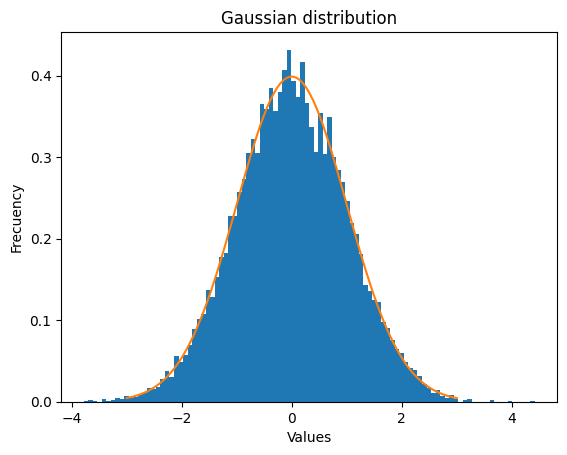

In [118]:
# Total random numbers
N = 10000

# Uniform distribution
Uni1 = np.random.uniform(0,1,N)
Uni2 = np.random.uniform(0,1,N)

# New gaussian distribution
X1 = np.zeros(N)


for i in range(N):
    R = m.sqrt(-2*(m.log(Uni1[i])))
    T = 2*m.pi*(Uni2[i])
    X1[i] = (R*m.cos(T))


# Histogram
hist, bins = np.histogram(X1, bins = 100)
plt.hist(X1, bins = bins.tolist(), density= True)

# Plot a gaussian to test the resemblance
import scipy.stats as stats
mu = 0
variance = 1
sigma = m.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('Values')
plt.ylabel('Frecuency')
plt.title('Gaussian distribution')

In [119]:
# Compute the mean and variance of the distribution
Mean = np.mean(X1)
Variance = np.var(X1)
print('Mean = ', Mean)
print('Variance = ', Variance)

Mean =  -0.0030056454030472466
Variance =  1.0170402487238877


In [120]:
# CONSTANTS
# Dampling coefficient
gam = 1


# Delta
D = 1



# Ex. 3

Text(0.5, 1.0, 'Random walk in an open box, $\\Gamma=1$')

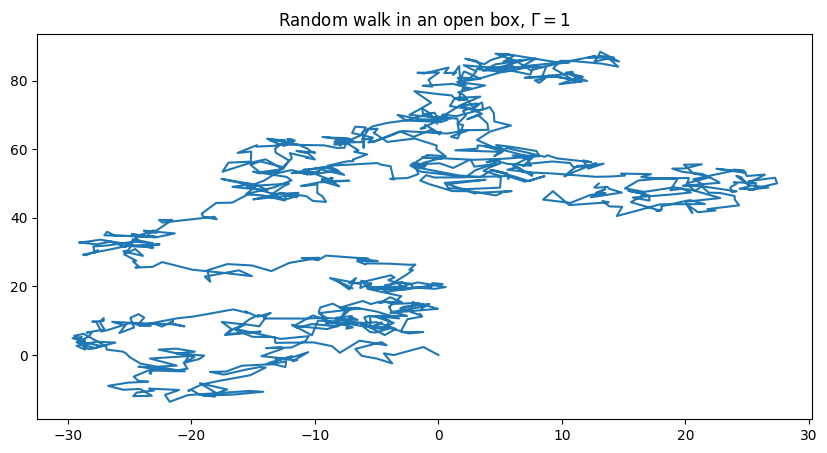

In [121]:


# Time
time = 1000

# Time step
step = 1

# Arrays of the particle's position
X = np.zeros(step*time)
Y = np.zeros(step*time)


@njit
def num_aleat(n):
    random_num = np.random.normal(0,1,size=(n,2))
    return random_num

numbers = num_aleat(step*time)


# Mayumara algorithm
for i in np.arange(1,step*time, step):
    sx = np.sqrt(2*D*step)*numbers[i][0]/gam
    sy = np.sqrt(2*D*step)*numbers[i][1]/gam
    if i==0:
        X[i]=  sx
        Y[i]=  sy
    else:
        X[i]= X[i-1] + sx
        Y[i]= Y[i-1] + sy
    sx, sy = 0,0

fig, ax = plt.subplots(figsize=(10,5))

plt.plot(X,Y)
plt.title('Random walk in an open box, ' + r'$\Gamma=1$')


# Ex. 4: Periodic boundary conditions

Text(0, 0.5, 'Box y axes')

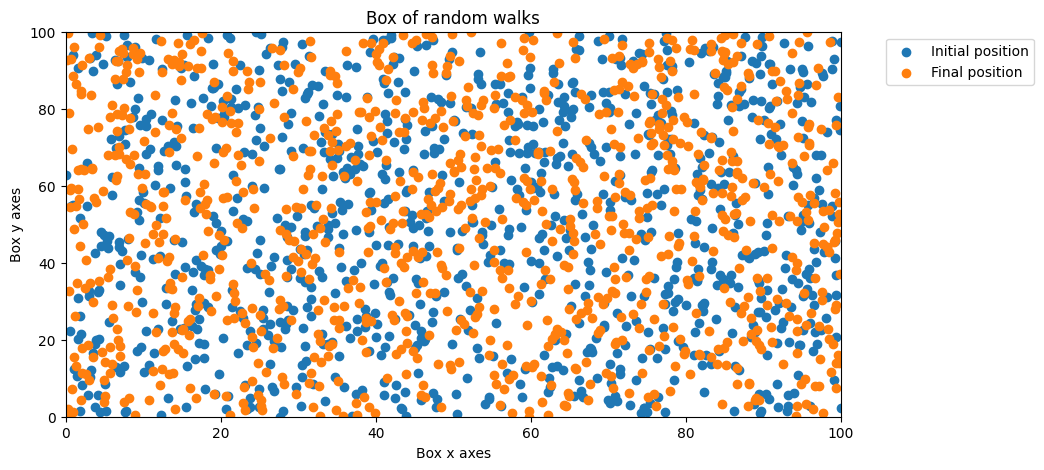

In [122]:


@njit
def num_aleat(n):
    random_num = np.random.normal(0,1,size=(n,1))
    return random_num

@njit
def num_aleat_box(n,L):
     box = np.random.uniform(0, L, size=(n,2))
     return box

@njit
def initialize_arrays(N, L):
    X = np.zeros((2,N))
    Y = np.zeros((2,N))

    initial_conditions = num_aleat_box(N, L)
    for i in range(N):
            X[0][i] =  initial_conditions[i][0]
            Y[0][i] =  initial_conditions[i][1]   

    X0 = np.copy(X[0, :]) 
    Y0 = np.copy(Y[0, :])
    return X0,Y0, X,Y

def mayurama_algoritm(N, time, step, X,Y, D):
    for j in np.arange(1,time, step):
            numbers_x = num_aleat(N)
            numbers_y = num_aleat(N)
            for i in range(N):
                
                sx = np.sqrt(2*D*step)*numbers_x[i]/gam
                sy = np.sqrt(2*D*step)*numbers_y[i]/gam

                X[1][i]= (X[0][i] + sx)%L
                Y[1][i]= (Y[0][i] + sy)%L
            
            X[0, :] = X[1, :]
            Y[0, :] = Y[1, :]
            
            X[1, :] = 0
            Y[1, :] = 0


# Particles
N = 1000

# Size box
L = 100
step = 1
time = 100*step


# Initialize arrays
x0, y0, X,Y = initialize_arrays(N, L)

# Do algorithm
mayurama_algoritm(N,time, step, X,Y, D)

# Plot it
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(np.array(x0), np.array(y0), label='Initial position')
plt.scatter(X[0,:],Y[0,:], label='Final position')
plt.xlim([0,L])
plt.ylim([0,L])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Box of random walks')
plt.xlabel('Box x axes')
plt.ylabel('Box y axes')

# Ex. 5: Mean Square Displacement

Slope diffusion coeff:  1.0017201913304412


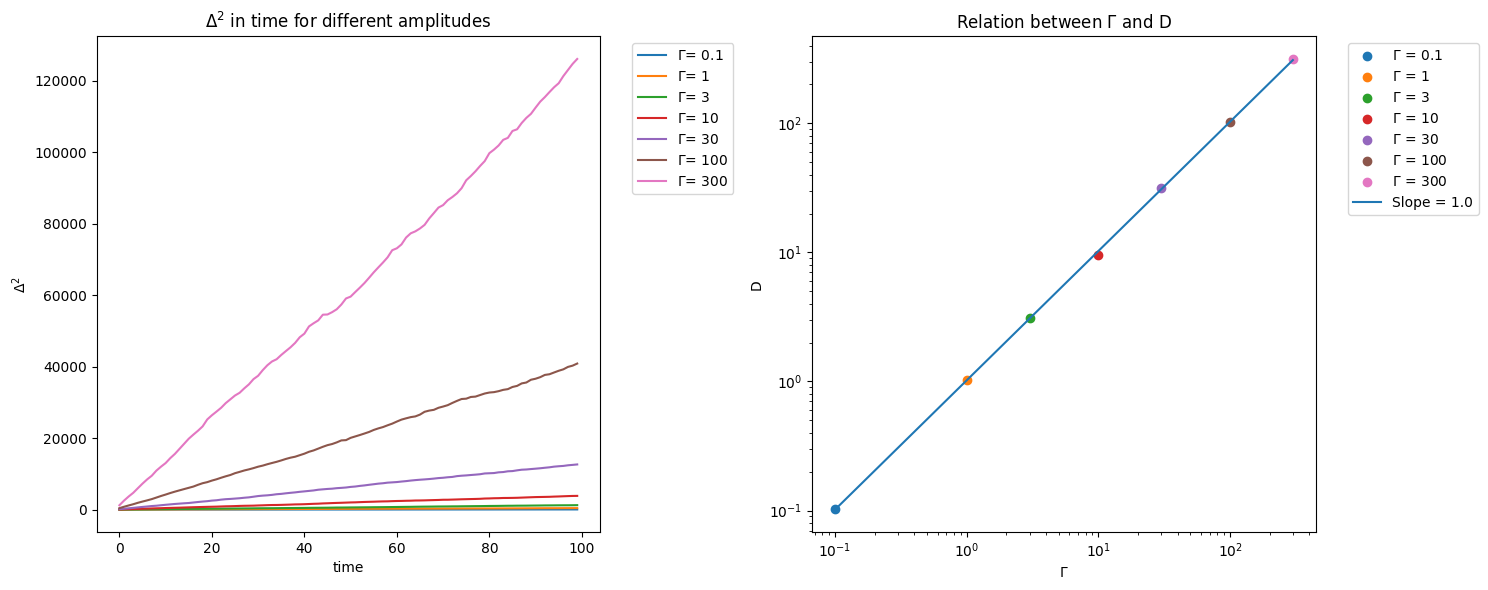

In [203]:
def MSD(N, L, time, D):
    x0, y0, X,Y = initialize_arrays(N, L)
    aux_msd = np.zeros((time, N))
    #print('x0',x0)
    for j in np.arange(0,time):
            numbers_x = num_aleat(N)
            numbers_y = num_aleat(N)
            msd = []
            for i in range(N):
                
                sx = np.sqrt(2*D)*numbers_x[i]
                sy = np.sqrt(2*D)*numbers_y[i]
                
                X[1][i]= X[0][i] + sx
                Y[1][i]= Y[0][i] + sy
                #print('sx', sx)
                
                # Compute MSD
                aux_msd[j][i] = (X[1][i] - x0[i])** 2 + (Y[1][i] - y0[i]) ** 2
                #print(x0)
            #if (j%10)==0:
                     #print(X[1,:])
                     #print('msd', msd)
            
            #print('aux',aux_msd)
            X[0, :] = np.copy(X[1, :])
            Y[0, :] = np.copy(Y[1, :])
            X[1, :] = 0
            Y[1, :] = 0
    return aux_msd

def average(array, time, particles):
    av_array = np.zeros(time)
    for j in range(time):
        sum = 0
        for k in range(particles):
            sum += array[j][k]
        av_array[j]= sum/particles
    return av_array



# Particles
N = 1000

# Size box
L = 100
step = 1
time = 100*step
D = [0.1,1,3,10,30, 100, 300]
dif = np.zeros(len(D))

# Start simulation and plotting
fig, ax = plt.subplots(1,2,figsize=(15,6))

for i in range(len(D)):
    aux_msd = MSD(N, L, time, D[i])
    av = average(aux_msd, time, N)
    dif[i] = av[-1]/(4*time)
    ax[1].scatter(D[i], dif[i], label = r'$\Gamma$' + f' = {D[i]}')
    ax[0].plot(range(time), av, label = r'$\Gamma$' + f'= {D[i]}')

ax[1].set_xlabel(r'$\Gamma$')
ax[1].set_ylabel('D')
ax[0].set_title(r'$\Delta^2$ in time for different amplitudes')
ax[0].set_xlabel('time')
ax[0].set_ylabel(r'$\Delta^2$')
ax[1].set_title('Relation between ' +  r'$\Gamma$' + ' and D')
ax[1].set_xscale('log')
ax[1].set_yscale('log')


# Adjust to a straight line
adjust_dif = stats.linregress(np.log(D), np.log(dif))
print('Slope diffusion coeff: ', adjust_dif.slope)

ax[1].plot(np.array(D), (np.array(D))**adjust_dif.slope * np.exp(adjust_dif.intercept), label=f'Slope = {np.round(adjust_dif.slope,2)}')
ax[0].legend(loc='best', bbox_to_anchor=(1.05, 1))
ax[1].legend(loc='best', bbox_to_anchor=(1.05, 1))

plt.tight_layout()

# Ex. 6: Absence of interactions

In [136]:
def mayurama_algoritm_ex6(N, time, step, X,Y, D, x0):
    samplesx = []
    samplesy = []
    times = np.array([1,10,30,100,1000])

    for j in np.arange(0,time, step):
            numbers_x = num_aleat(N)
            numbers_y = num_aleat(N)
            X1=[]
            for i in range(N):
                
                sx = np.sqrt(2*D*step)*numbers_x[i]/gam
                sy = np.sqrt(2*D*step)*numbers_y[i]/gam

                X[1][i]= X[0][i] + sx
                Y[1][i]= Y[0][i] + sy

            if np.any(times==j):
                samplesx.append(np.copy(X[1,:]-x0))
                
            X[0, :] = X[1, :]
            Y[0, :] = Y[1, :]
            
            X[1, :] = 0
            Y[1, :] = 0
    return samplesx, samplesy


# Particles
N = 1000

# Size box
L = 100
step = 1
time = 1001*step
D = 1
times = np.array([1,10,30,100,1000])

# Initialize arrays
x0, y0, X,Y = initialize_arrays(N, L)

# Do algorithm
samplex_data, sampley_data = mayurama_algoritm_ex6(N,time, step, X,Y, D, x0)


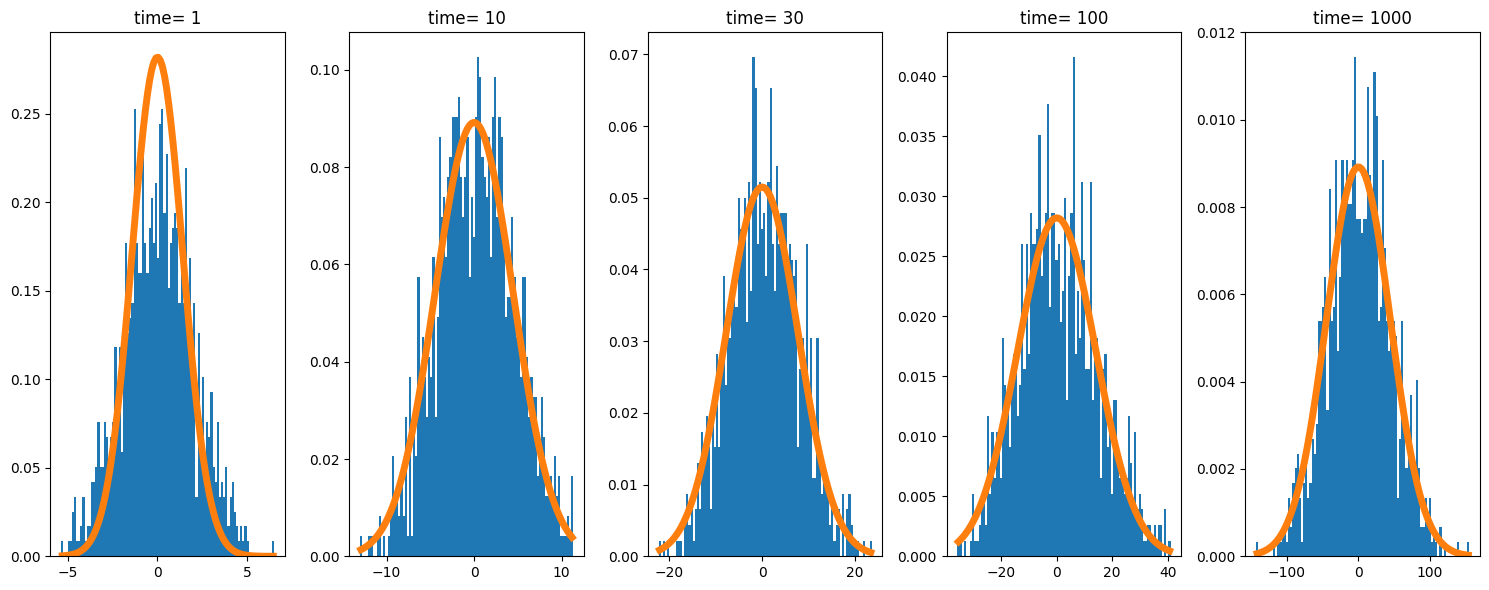

In [149]:

# Define Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

D=1
fig, ax = plt.subplots(1, len(times),figsize=(15,6))
for i in range(len(times)): 
    hist, bins = np.histogram(samplex_data[i], bins = 100)
    ax[i].hist(samplex_data[i], bins=bins.tolist(), density=True)
    delta = bins[1]-bins[0]
    bin_centers = bins[:-1]+delta/2
    
    ax[i].plot(bin_centers, gaussian(bin_centers, 1/np.sqrt((4*np.pi*D*times[i])), 0, np.sqrt(2*D*times[i])), linewidth = 5)
    ax[i].set_title(f'time= {times[i]}')
    #ax[i].plot(samplex_data[i], gaussian(samplex_data[i],1/np.sqrt(4*np.pi*times[i]) ,0, np.sqrt(2*D*times[i])))
    
plt.tight_layout()

# Ex. 8: Stokes-Einstein relation and response function

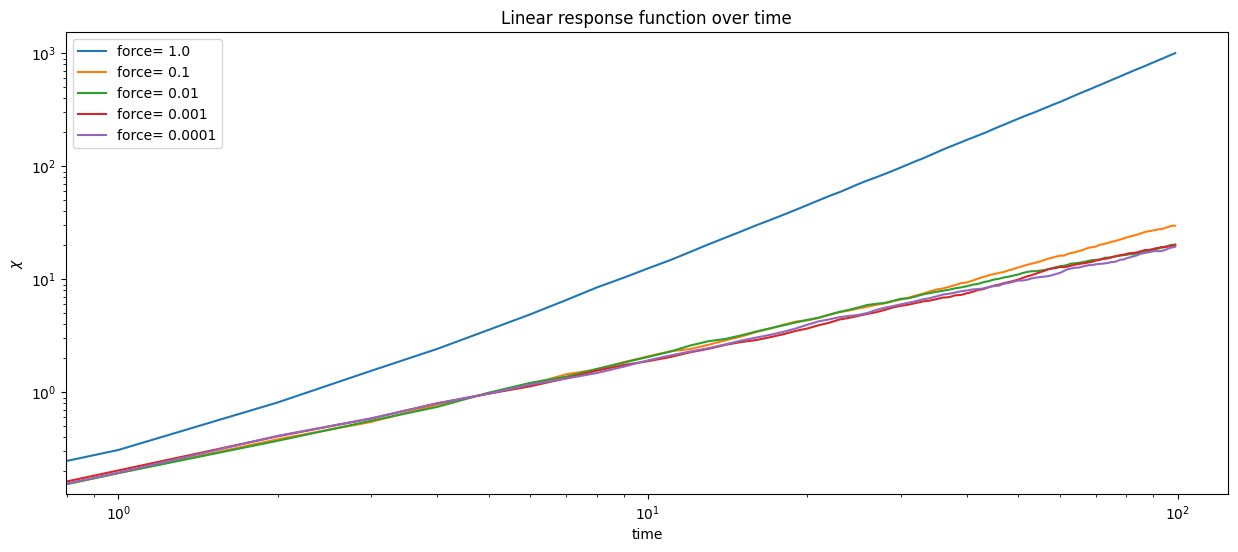

In [213]:
def linearresponse(N, time, D, f):
    x0, y0, X,Y = initialize_arrays(N, L)
    
    aux_msd = np.zeros(time)
    e = np.random.choice([-1,1],N)
    
    T=5
    for j in np.arange(1,time):
            #numbers_x = num_aleat(N)
            #numbers_y = num_aleat(N)
            aux = 0 
            for i in range(N):
                
                sx = np.sqrt(2*D)*np.random.normal(0,1)
                
                X[1][i]= X[0][i] + sx + e[i]*f
            
                aux += (X[1][i] - x0[i])**2 
                sx =0
            
            aux_msd[j] = aux/(2*N*T)
            X[0, :] = np.copy(X[1, :])
            Y[0, :] = np.copy(Y[1, :])
            X[1, :] = 0
            Y[1, :] = 0
    return aux_msd

def average(array, time, particles):
    av_array = np.zeros(time)
    for j in range(time):
        sum = 0
        for k in range(particles):
            sum += array[j][k]
        av_array[j]= sum/particles
    return av_array

from scipy import stats
from scipy.stats import linregress

# Particles
N = 1000

# Size box
L = 100
step = 1
D = 1
time = 100*step
force = np.array([1,0.1,0.01,0.001,0.0001])
mobility = np.zeros(len(force))
T = 1

# Start simulation and plotting
fig, ax = plt.subplots(figsize=(15,6))

for i in range(len(force)):
    lin_resp_av = linearresponse(N,time, D, force[i])
    plt.title('Linear response function over time')
    plt.plot(np.arange(time), lin_resp_av, label= f'force= {force[i]}')
    plt.legend()
plt.xlabel('time')
plt.ylabel(r'$\chi$')
plt.xscale('log')
plt.yscale('log')

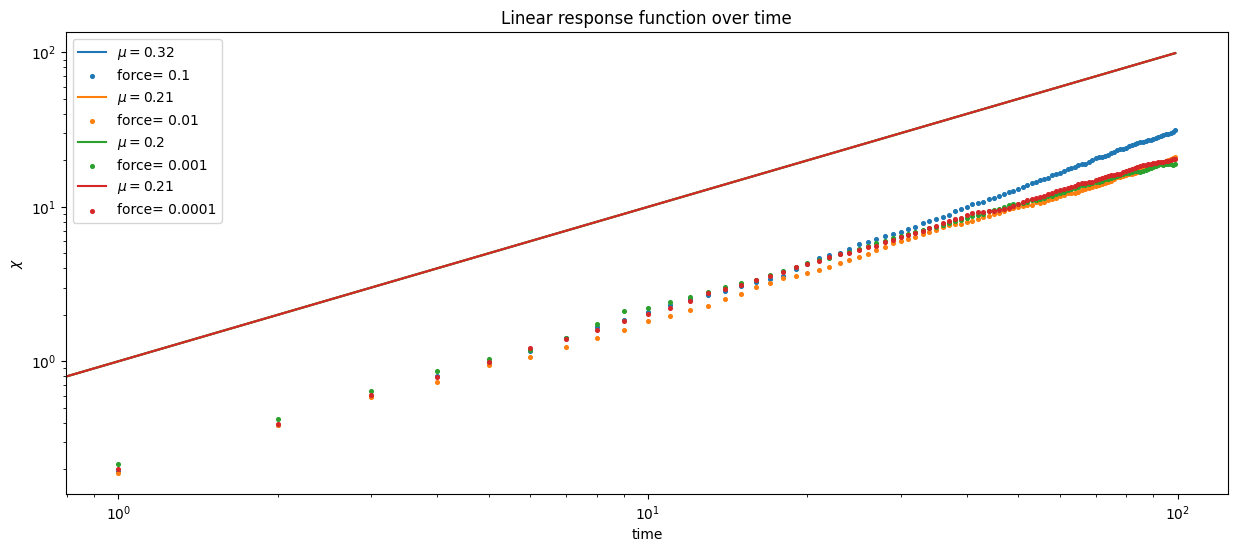

In [214]:

force = np.array([0.1,0.01,0.001,0.0001])
mobility = np.zeros(len(force))

mu = np.zeros(len(force))

# Start simulation and plotting
fig, ax = plt.subplots(figsize=(15,6))

for i in range(len(force)):
    lin_resp_av = linearresponse(N,time, D, force[i])
    plt.title('Linear response function over time')
    mu[i] = stats.linregress(np.arange(time), lin_resp_av).slope
    plt.plot(np.arange(time), D*np.arange(time), label= r'$\mu= $' + f'{np.round(mu[i],2)}')
    plt.scatter(np.arange(time), lin_resp_av, s=7,label= f'force= {force[i]}')
    plt.legend()
plt.xlabel('time')
plt.ylabel(r'$\chi$')
plt.xscale('log')
plt.yscale('log')


In [219]:
print(mu*5)

[1.6158576  1.03441379 0.99131235 1.05995556]
